# Deep Learning from Scratch Ch04
* from 4.3 Numerical Differentiation ~

## 4.3 수치 미분

* 경사법에서는 기울기(경사)값을 기준으로 나아갈 방향을 정한다.
* 기울기란 무엇인지, 어떤 성질이 있는지에 앞서 
* 이번절에서는 '미분'부터 복습해보도록한다.

In [6]:
# 나쁜 구현의 예

def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h)-f(X)) / h

* 위의 구현은 두 가지 문제를 가지고 있다
* 첫 째, 반올림오차(rounding error)문제를 일으킬 수 있다

In [7]:
# 위의 방법은 반올림오차(rounding error)문제를 일으킨다.
# 반올림 오차는 작은 값이 되어 결국 최종 계산에 오차가 생기계 된다

In [8]:
import numpy as np

np.float32(1e-50)

0.0

* 또한 함수 f의 차분과 관련해서 문제점이 있다
* 위의 구현에서는 x + h와 x사이의 함수 f의 차분을 계산하고 있지만 당초 이 계산에는 오차가 있다는 사실에 주의해야 한다.

* 수치 미분에는 오차가 포함되어 있다. 이 오차를 줄이기 위해 (x + h)와 (x - h)일 때의 함수 f의 차분을 계산하는 방법을 쓰기도 한다.
* 이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 **중심 차분** 혹은 **중앙 차분**이라 한다.

In [9]:
def numerical_diff(f, x):
    h=1e-4  # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2 수치 미분의 예

* 앞서 배운 수치 미분을 사용하여 간단한 함수를 미분해보자
* y = 0.01x**2 + 0.1x라는 함수가 있다.

In [13]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

이 함수를 그려보자

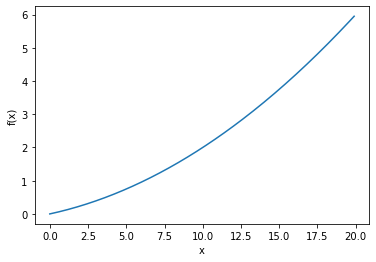

In [14]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 0.1간격의 배열을 만든다(20은 미포함)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

x가 5일 때와 x가 10일 때 이 함수의 미분을 계산해보자

In [15]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


* Q. 이 값이 의미하는 바는 무엇일까?

* f(x)의 x에 대한 변화량을 의미한다. 
* 즉, x의 '작은 변화'가 함수 f(x)를 얼마나 변화시켰는지를 나타낸다.

0.1999999999990898


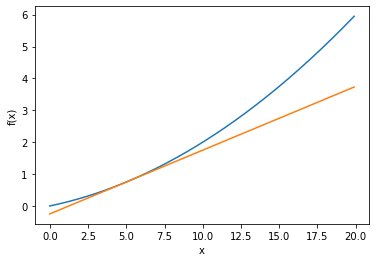

In [16]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x 

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

0.2999999999986347


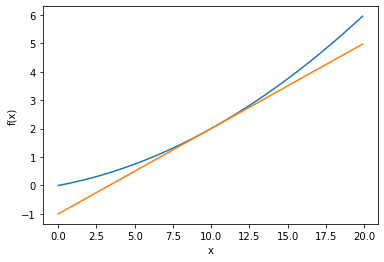

In [18]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 4.3.3 편미분

In [19]:
# 인수 x는 numpy 배열이라고 가정하자

def function_2(x): 
    return x[0]**2 + x[1]**2
    # or np.sum(x**2)

* 위의 함수를 미분할 때는 주의할 점이 있다
* 바로 변수가 2개라는 것이다
* 즉 x0와 x1중 어느 변수에 대한 미분이냐를 구별해야 한다
* 이와 같이 변수가 여럿인 함수에 대한 미분을 편미분이라고 한다

문제1. x0 = 3, x1 = 4일 때, x0에 대한 편미분을 구하라

In [20]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [23]:
def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [24]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

문제2. x0=3, x1=4일때, x1에 대한 편미분을 구하여라

In [26]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [27]:
numerical_diff(function_tmp2, 4)

7.999999999999119

### 정리

* 이처럼 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다.
* 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다.
* 앞선 예시에서는 목표 변수를 제외한 나머지를 특정 값에 고정하기 위해서 새로운 함수를 정의했다.
* 그리고 새로 정의한 함수에 대해 그동안 사용한 수치 미분 함수를 적용하여 편미분을 구한 것이다.